# \[GNN\] Neural Network

김보람  
2023-06-02

# ref

https://python-course.eu/machine-learning/neural-networks-structure-weights-and-matrices.php

# Neural Networks, Structure, Weights and Matrices

## Introduction

![](https://python-course.eu/images/machine-learning/example_network_3_4_2_without_bias.webp)

In [15]:
import numpy as np

input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]

In [16]:
import numpy as np

input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)

print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)

## Weights and Matrices

![](https://python-course.eu/images/machine-learning/weight_matrix_input.webp)

![](https://python-course.eu/images/machine-learning/weight_matrix_hidden.webp)

## Initializing the weight matrices

In [17]:
import numpy as np

number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)

# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True

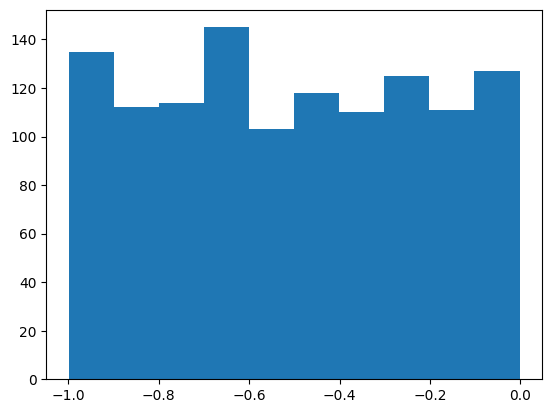

In [18]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()


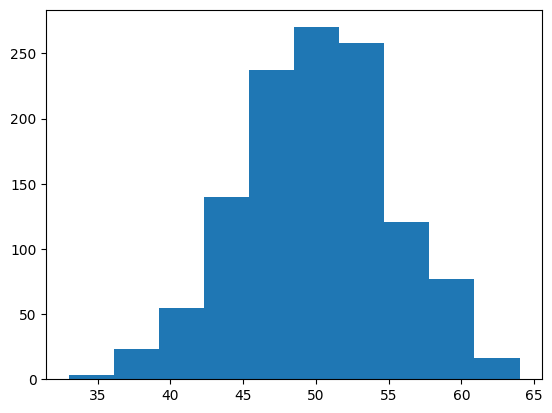

In [19]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

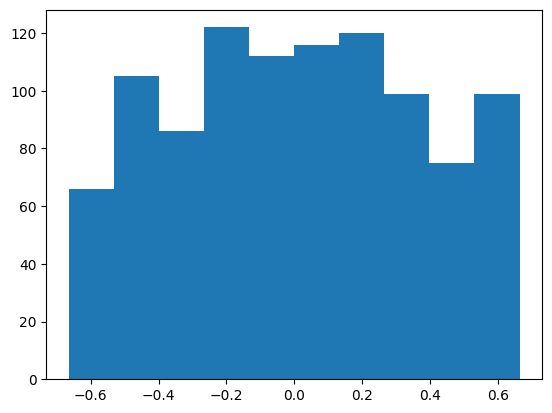

In [20]:
from scipy.stats import truncnorm

s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)

plt.hist(s)
plt.show()

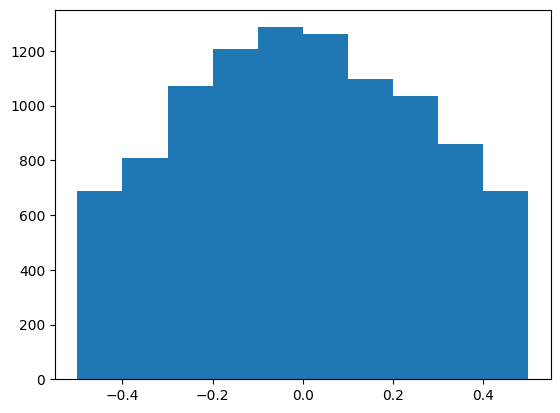

In [21]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)

plt.hist(s)
plt.show()

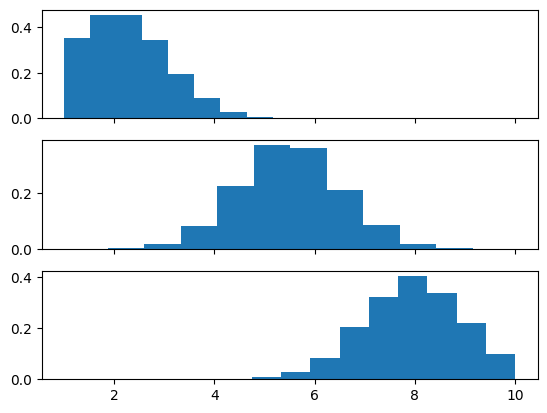

In [22]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()

In [23]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

In [24]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes)  # this is the input in this layer!

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

# Running a Neural Network with Python

## A Neural Network Class

In [25]:
import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
   
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes,  # corresponds to the number of classes
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes 
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate  
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
           
    
    def train(self):
        pass
    
    def run(self):
        pass

In [26]:
simple_network = NeuralNetwork(no_of_in_nodes = 3, 
                               no_of_out_nodes = 2, 
                               no_of_hidden_nodes = 4,
                               learning_rate = 0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[-0.19553012  0.23292966  0.0867214 ]
 [ 0.35698122 -0.04817757  0.55330426]
 [-0.21701452 -0.2177187   0.24132042]
 [ 0.24152886 -0.19581161 -0.15966314]]
[[ 0.24162019  0.03084706 -0.06963859 -0.31704571]
 [-0.03889086  0.15380858 -0.19090609  0.46296621]]

## Activation Functions, Sigmoid and ReLU

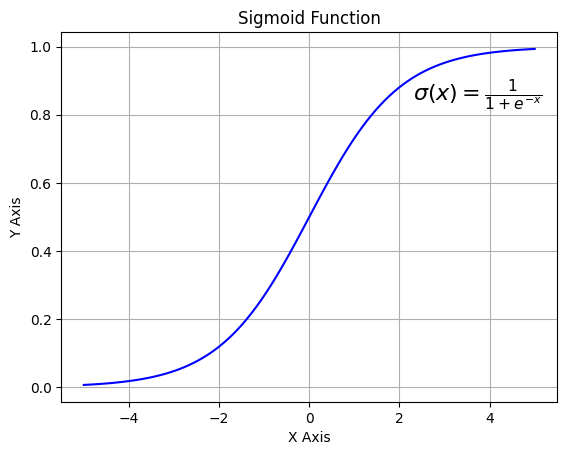

In [27]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)


plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)


plt.show()

In [28]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]

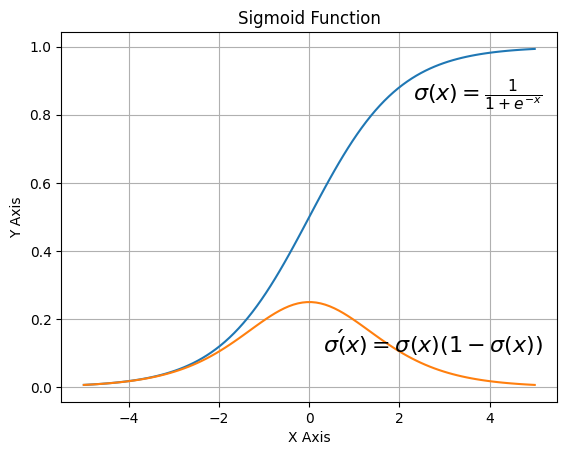

In [29]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)

plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()

plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)


plt.show()

In [30]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

In [31]:
# alternative activation function
def ReLU(x):
    return np.maximum(0.0, x)

# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1

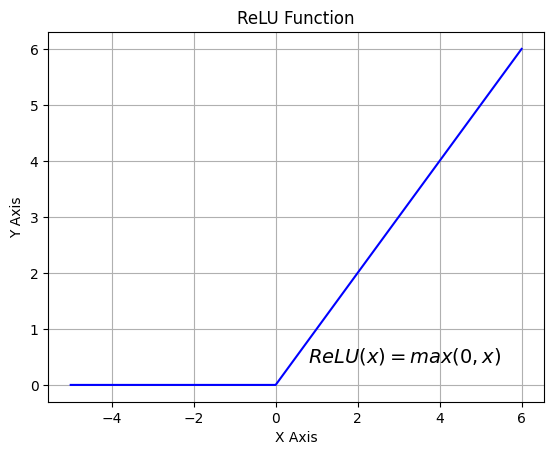

In [32]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

## Adding a run Method

In [33]:
from scipy.special import expit as activation_function

In [34]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


class NeuralNetwork:
           
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    
    def train(self, input_vector, target_vector):
        pass
            
    
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'. 
        'input_vector' can be tuple, list or ndarray
        """
        # turning the input vector into a column vector
        # turn one-dimensional into 2-dimensional column vector:
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector

In [35]:
simple_network = NeuralNetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=4,
                               learning_rate=0.6)

In [36]:
simple_network.run([(3, 4)])